<a href="https://colab.research.google.com/github/hemasphere/CS381/blob/main/H_Muni_Quiz2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hema Muni

CS 381

Quiz 2

#**Data Loading**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/hemasphere/CS381/main/imports-85.data", 
                 names = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors",
              "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width", "height", 
              "curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore",
              "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"])
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


#**Exploratory Data Analysis**



Question: 

1.   Does the horsepower affect the price?

**Attributes**
1. symboling: this is the insurance risk level of a car. It ranges from -3 to 3, -3 means the car is most likely safe and 3 means it may be most risky. 
2. normalized-losses: this is the relative average loss payment per insured vehicle year. It ranges from 65 to 256.
3. make: the car make, and in the dataset there are:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo
4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.

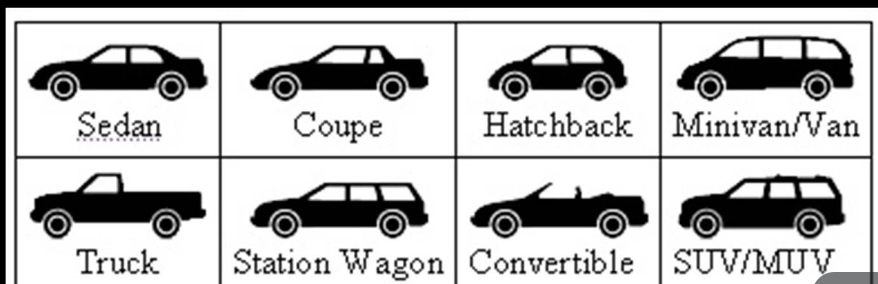


8. drive-wheels: 4wd, fwd, rwd.


*   4wd: 4 wheel drive (good for snowy areas) and all 4 wheels have power
*   fwd: Front wheels have power
*   rwd: Rear wheels have power

9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.

*   dohc = Dual overhead cam engines
*   l = Toyota engine
*   ohc = Over Head Cam
*   I can't find any information on rotor.

16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
*   the diameter of the circular opening at its end

20. stroke: continuous from 2.07 to 4.17.
*   the depth of the hole

21. compression-ratio: continuous from 7 to 23.
*   how much air has been compressed in engine
22. horsepower: continuous from 48 to 288.
*   the power an engine produces
*   It's calculated through the power needed to move 550 pounds one foot in one second or by the power needs to move 33,000 pounds one foot in one minute. 
23. peak-rpm: continuous from 4150 to 6600.
*   top revolutions per minute you can hit
24. city-mpg: continuous from 13 to 49.
*   the score a car will get on average in city conditions, with stopping and starting at lower speeds
25. highway-mpg: continuous from 16 to 54.
*   the average a car will get while driving on an open stretch of road without stopping or starting, typically at a higher speed.
26. price: continuous from 5118 to 45400.
*   price for the car



In [ ]:
df.dtypes

In [ ]:
df.isnull().sum()

Filter that data out because we don't want any unknowns

In [4]:
#get mean and mode of each attribute so we can replace bad values with the meam and mode
symbol_mean=df["symboling"].mean()
#get second mode because 1st is a question mark
normalized_losses_mode=df["normalized-losses"].value_counts().index.tolist()[1] 
make_mode=df["make"].mode()
fuel_type_mode=df["fuel-type"].mode()
aspiration_mode=df["aspiration"].mode()
num_of_doors_mode=df["num-of-doors"].mode()
body_style_mode=df["body-style"].mode()
drive_wheels_mode=df["drive-wheels"].mode()
engine_location_mode=df["engine-location"].mode()
wheel_base_mean=df["wheel-base"].mean()
length_mean=df["length"].mean()
weight_mean=df["width"].mean()
height_mean=df["height"].mean()
curb_weight_mean=df["curb-weight"].mean()
engine_type_mode=df["engine-type"].mode()
num_of_cylinders_mode=df["num-of-cylinders"].mode()
engine_size_mean=df["engine-size"].mean()
fuel_system_mode=df["fuel-system"].mode()
bore_mode=df["bore"].mode()
stroke_mode=df["stroke"].mode()
compression_ratio_mode=df["compression-ratio"].mean()
horsepower_mode=df["horsepower"].mode()
peak_rpm_mode=df["peak-rpm"].mode()
city_mpg_mean=df["city-mpg"].mean()
highway_mpg_mean=df["highway-mpg"].mean()
#get second mode because 1st is a question mark
price_mode=df["price"].value_counts().index.tolist()[1] 


In [ ]:
df["symboling"] = df["symboling"].replace([np.nan, "?"], symbol_mean)
df["normalized-losses"] = df["normalized-losses"].replace([np.nan, "?"], normalized_losses_mode)
df["make"] = df["make"].replace([np.nan, "?"], [make_mode, make_mode])
df["fuel-type"] = df["fuel-type"].replace([np.nan, "?"], [fuel_type_mode, fuel_type_mode])
df["aspiration"] = df["aspiration"].replace([np.nan, "?"], [aspiration_mode, aspiration_mode])
df["num-of-doors"] = df["num-of-doors"].replace([np.nan, "?"], [num_of_doors_mode, num_of_doors_mode])
df["body-style"] = df["body-style"].replace([np.nan, "?"], [body_style_mode, body_style_mode])
df["drive-wheels"] = df["drive-wheels"].replace([np.nan, "?"], [drive_wheels_mode, drive_wheels_mode])
df["engine-location"] = df["engine-location"].replace([np.nan, "?"], [engine_location_mode, engine_location_mode])
df["wheel-base"] = df["wheel-base"].replace([np.nan, "?"], [wheel_base_mean, wheel_base_mean])
df["length"] = df["length"].replace([np.nan, "?"], [length_mean, length_mean])
df["width"] = df["width"].replace([np.nan, "?"], [weight_mean, weight_mean])
df["height"] = df["height"].replace([np.nan, "?"], [height_mean, height_mean])
df["curb-weight"] = df["curb-weight"].replace([np.nan, "?"], [curb_weight_mean, curb_weight_mean])
df["engine-type"] = df["engine-type"].replace([np.nan, "?"], [engine_type_mode, engine_type_mode])
df["num-of-cylinders"] = df["num-of-cylinders"].replace([np.nan, "?"], [num_of_cylinders_mode, num_of_cylinders_mode])
df["engine-size"] = df["engine-size"].replace([np.nan, "?"], [engine_size_mean, engine_size_mean])
df["fuel-system"] = df["fuel-system"].replace([np.nan, "?"], [fuel_system_mode, fuel_system_mode])
df["bore"] = df["bore"].replace([np.nan, "?"], [bore_mode, bore_mode])
df["stroke"] = df["stroke"].replace([np.nan, "?"], [stroke_mode, stroke_mode])
df["compression-ratio"] = df["compression-ratio"].replace([np.nan, "?"], [compression_ratio_mode, compression_ratio_mode])
df["horsepower"] = df["horsepower"].replace([np.nan, "?"], [horsepower_mode, horsepower_mode])
df["peak-rpm"] = df["peak-rpm"].replace([np.nan, "?"], [peak_rpm_mode, peak_rpm_mode])
df["city-mpg"] = df["city-mpg"].replace([np.nan, "?"], [city_mpg_mean, city_mpg_mean])
df["highway-mpg"] = df["highway-mpg"].replace([np.nan, "?"], [highway_mpg_mean, highway_mpg_mean])
df["price"] = df["price"].replace([np.nan, "?"], [price_mode, price_mode])

df

In [6]:
df["normalized-losses"] = pd.to_numeric(df["normalized-losses"])
df[["bore"]] = df[["bore"]].astype('float64')
df[["stroke"]] = df[["stroke"]].astype('float64')
df["horsepower"] = pd.to_numeric(df["horsepower"])
df[["peak-rpm"]] = df[["peak-rpm"]].astype('float64')
df[["price"]] = df[["price"]].astype('float64')

In [ ]:
df.nunique()

In [ ]:
df.dtypes

In [ ]:
cat_vals = df[['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
                    'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']].copy()
for x in range(len(cat_vals.columns)):
    print(cat_vals.columns[x] + ":")
    print(cat_vals[cat_vals.columns[x]].unique(), "\n")

In [8]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.00000,205.000000,205.000000,205.000000
mean,0.834146,129.800000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.335415,3.258244,10.142537,103.902439,5129.02439,25.219512,30.751220,13123.497561
std,1.245307,35.330429,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273817,0.314237,3.972040,39.680343,478.40526,6.542142,6.886443,7891.178520
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.00000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.00000,19.000000,25.000000,7788.000000
50%,1.000000,128.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.00000,24.000000,30.000000,10198.000000
75%,2.000000,161.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.600000,3.410000,9.400000,116.000000,5500.00000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.00000,49.000000,54.000000,45400.000000


##Categorial Data

In [ ]:
#count values of all categorial data
print('\033[1m'+"Make:\n"+'\033[0m', df["make"].value_counts())
print('\033[1m'+"\nFuel-Type:\n"+'\033[0m', df["fuel-type"].value_counts())
print('\033[1m'+"\nAspiration:\n"+'\033[0m', df["aspiration"].value_counts())
print('\033[1m'+"\nNum-of-Doors:\n"+'\033[0m', df["num-of-doors"].value_counts())
print('\033[1m'+"\nBody-Style:\n"+'\033[0m', df["body-style"].value_counts())
print('\033[1m'+"\nDrive-Wheels:\n"+'\033[0m', df["drive-wheels"].value_counts())
print('\033[1m'+"\nEngine-Location:\n"+'\033[0m', df["engine-location"].value_counts())
print('\033[1m'+"\nEngine-Type:\n"+'\033[0m', df["engine-type"].value_counts())
print('\033[1m'+"\nNum-of_Cylinders:\n"+'\033[0m', df["num-of-cylinders"].value_counts())
print('\033[1m'+"\nFuel-System:\n"+'\033[0m', df["fuel-system"].value_counts())

In [ ]:
#matplotlib
df['make'].value_counts().plot.bar(title = "Freq Dist of Make", color = "plum");

In [ ]:
df["fuel-type"].value_counts().plot.bar(title = "Freq Dist of Fuel Type", color = "pink");

In [ ]:
df["aspiration"].value_counts().plot.bar(title = "Freq Dist of Aspiration", color = "powderblue");

In [ ]:
df["num-of-doors"].value_counts().plot.bar(title = "Freq Dist of Number of Doors", color = "palevioletred");

In [ ]:
df["body-style"].value_counts().plot.bar(title = "Freq Dist of Body Style", color = "mediumturquoise");

In [ ]:
df["drive-wheels"].value_counts().plot.bar(title = "Freq Dist of Drive Wheels", color = "salmon");

In [ ]:
df["engine-location"].value_counts().plot.bar(title = "Freq Dist of Engine Location", color = "mediumseagreen");

In [ ]:
df["engine-type"].value_counts().plot.bar(title = "Freq Dist of Engine Type", color = "sandybrown");

In [ ]:
df["num-of-cylinders"].value_counts().plot.bar(title = "Freq Dist of Number of Cylinders", color = "teal");

In [ ]:
df["fuel-system"].value_counts().plot.bar(title = "Freq Dist of Fuel System", color = "navajowhite");

In [ ]:
#seaborn
sns.catplot(x="make", kind="count", data=df)
#since the words keep mushing together, this is so they don't on the x axis
plt.xticks(rotation=90)
sns.catplot(x="fuel-type", kind="count", data=df, palette="pastel")
sns.catplot(x="aspiration", kind="count", data=df, palette="Paired")
sns.catplot(x="num-of-doors", kind="count", data=df, palette="RdPu")
sns.catplot(x="body-style", kind="count", data=df, palette="pastel")
sns.catplot(x="drive-wheels", kind="count", data=df, palette="Paired")
sns.catplot(x="engine-location", kind="count", data=df, palette="RdPu")
sns.catplot(x="engine-type", kind="count", data=df, palette="ch:.25")
sns.catplot(x="num-of-cylinders", kind="count", data=df, palette="Paired")
sns.catplot(x="fuel-system", kind="count", data=df, palette="RdPu")


All of these graphs look good to me and I chose to do a bar graph so it's easier to see the modes between each category

##Numerical Data

In [ ]:
#count values of all numerical data
print('\033[1m'+"Symboling:\n"+'\033[0m', df["symboling"].value_counts())
print('\033[1m'+"\nNormalized-Losses:\n"+'\033[0m', df["normalized-losses"].value_counts())
print('\033[1m'+"\nWheel-Base:\n"+'\033[0m', df["wheel-base"].value_counts())
print('\033[1m'+"\nLength:\n"+'\033[0m', df["length"].value_counts())
print('\033[1m'+"\nWidth:\n"+'\033[0m', df["width"].value_counts())
print('\033[1m'+"\nHeight:\n"+'\033[0m', df["height"].value_counts())
print('\033[1m'+"\nCurb-Weight:\n"+'\033[0m', df["curb-weight"].value_counts())
print('\033[1m'+"\nEngine-Type:\n"+'\033[0m', df["engine-type"].value_counts())
print('\033[1m'+"\nEngine-Size:\n"+'\033[0m', df["engine-size"].value_counts())
print('\033[1m'+"\nBore:\n"+'\033[0m', df["bore"].value_counts())
print('\033[1m'+"\nStroke:\n"+'\033[0m', df["stroke"].value_counts())
print('\033[1m'+"\nCompression-Ratio:\n"+'\033[0m', df["compression-ratio"].value_counts())
print('\033[1m'+"\nHorsepower:\n"+'\033[0m', df["horsepower"].value_counts())
print('\033[1m'+"\nPeak-RPM	:\n"+'\033[0m', df["peak-rpm"].value_counts())
print('\033[1m'+"\nCity-MPG	:\n"+'\033[0m', df["city-mpg"].value_counts())
print('\033[1m'+"\nHighway-MPG:\n"+'\033[0m', df["highway-mpg"].value_counts())
print('\033[1m'+"\nPrice:\n"+'\033[0m', df["price"].value_counts())

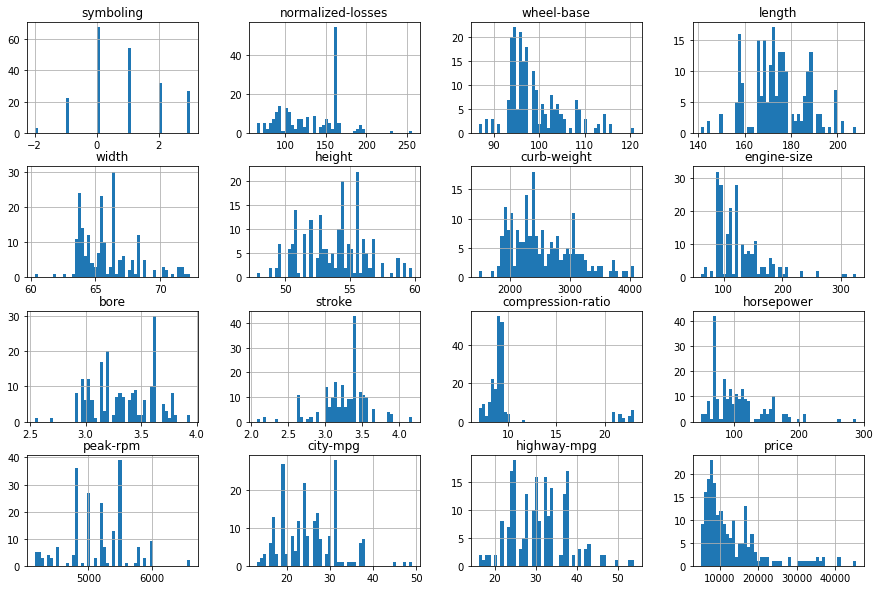

In [ ]:
#histograms matplot
numericDataColumns = ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight',
                      'engine-type', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 
                      'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
num_vals = df[numericDataColumns].copy()
num_vals.hist(bins=50, figsize=(15,10))
plt.show()

These graphs look good but I think for me it seems that for compression-ratio, from a range of 11-20, there is barely any activity there and I'm unsure of why. I don't get what the reason would be that between these numbers, there is no data being found/collected

In [ ]:
#histograms seaborn
sns.histplot(df['symboling'], color="mediumseagreen");

In [ ]:
sns.histplot(df['normalized-losses'] , color="mediumturquoise");

In [ ]:
sns.histplot(df['wheel-base'], color="navajowhite");

In [ ]:
sns.histplot(df['length'], color="tan");

In [ ]:
sns.histplot(df['width'], color="springgreen");

In [ ]:
sns.histplot(df['height'], color="powderblue");

In [ ]:
sns.histplot(df['curb-weight'], color="pink");

In [ ]:
sns.histplot(df['engine-type'], color="palevioletred");

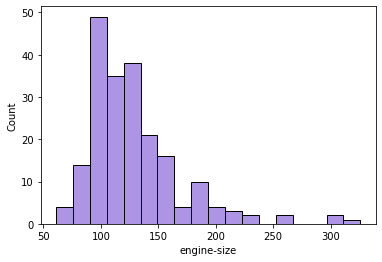

In [ ]:
sns.histplot(df['engine-size'], color="mediumpurple");

In [ ]:
sns.histplot(df['bore'], color="plum");

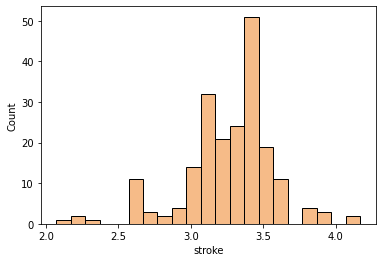

In [ ]:
sns.histplot(df['stroke'], color="sandybrown");

In [ ]:
sns.histplot(df['compression-ratio'], color="teal");

In [ ]:
sns.histplot(df['horsepower'], color="cornflowerblue");

In [ ]:
sns.histplot(df['peak-rpm'], color="lavenderblush");

In [ ]:
sns.histplot(df['city-mpg'], color="rosybrown");

In [ ]:
sns.histplot(df['highway-mpg'], color="salmon");

In [ ]:
sns.histplot(df['price'], color="lightskyblue");

In [9]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.446686,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.092521,0.007019,-0.178515,0.069906,0.273886,-0.035823,0.034606,-0.079110
normalized-losses,0.446686,1.000000,0.036644,0.147479,0.203334,-0.350396,0.253503,0.290259,0.084936,0.104210,-0.099213,0.353775,0.196267,-0.338417,-0.301092,0.306156
wheel-base,-0.531954,0.036644,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.471522,0.155438,0.249786,0.354480,-0.363015,-0.470414,-0.544082,0.585105
length,-0.357612,0.147479,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.591369,0.125566,0.158414,0.548479,-0.283001,-0.670909,-0.704662,0.687628
width,-0.232919,0.203334,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.551066,0.181693,0.181129,0.636906,-0.216906,-0.642704,-0.677218,0.721952
height,-0.541038,-0.350396,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.134157,-0.070467,0.261214,-0.106483,-0.322395,-0.048640,-0.107358,0.143158
curb-weight,-0.227691,0.253503,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.635681,0.165938,0.151362,0.748539,-0.266021,-0.757414,-0.797465,0.818597
engine-size,-0.105790,0.290259,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.550302,0.190894,0.028971,0.806325,-0.242931,-0.653658,-0.677470,0.858898
bore,-0.092521,0.084936,0.471522,0.591369,0.551066,0.134157,0.635681,0.550302,1.000000,-0.045813,0.001259,0.565843,-0.209752,-0.605068,-0.604011,0.526589
stroke,0.007019,0.104210,0.155438,0.125566,0.181693,-0.070467,0.165938,0.190894,-0.045813,1.000000,0.184040,0.070624,-0.034337,-0.053772,-0.054025,0.084049


To answer my question, it does seem that horsepower and price are highly correlated to each other and do have an affect on one or another

#**Data Preparation & Feature Engineering**

1.  (10 Points) Which numeric variables contained within the data set appear to require the use of a feature scaling method for purposes of preparing them for use within a machine learning algorithm? Be sure to list each relevant variable and explain why you believe each variable that you’ve identified requires the use of some sort of feature scaling method.


I would say for the scaling method it would have to be standardization for a lot of the numeric variables. One example would be price because it would be a lot easier to see if there are any outliers and see why the price would be either very low or very high and what correlates with it. 

2. (15 Points) Consider the number-of-doors and price variables: Based on your EDA work, how many missing data values occur within each of these attributes? As we’ve learned, missing data values can impede the proper functioning of many machine learning algorithms. To address the missing the number-of-doors and price values, you have been instructed to formulate what you believe will be an effective data imputation approach for purposes of estimating reasonable proxies for the missing data values. Your supervisor tells you that the affected data observations MUST be retained within the data set, and that it would be inappropriate to use either a mean, median, or mode value for any of the missing values since doing so would increase the likelihood of introducing unwarranted bias within the data set. Describe the imputation method you would employ for each variable. Then, using your Python skills, apply your prescribed imputation methods to the variables. Be sure to include graphics and commentary that explain your approach as well as the results of your efforts.


In [ ]:
num_of_doors_missing_question_mark = df[df['num-of-doors']=="?"].count()['num-of-doors']
num_of_doors_missing_question_mark

2

In [ ]:
price_missing_question_mark = df[df['price']=="?"].count()['price']
price_missing_question_mark

4

In [ ]:
from sklearn.impute import KNNImputer
# define imputer
imputer = KNNImputer()
# fit on the dataset
#imputer.fit(df)
# transform the dataset
#dftrans = imputer.transform(price_missing_question_mark)
# print total missing

3. (15 Points) Consider the engine-size and stroke variables: Describe the specific feature scaling method you would apply to each of them. Then, using Python, generate both a histogram and a boxplot for the original content of these two variables. Next, apply your prescribed feature scaling methods to the two variables and create histograms and boxplots that show the results of your feature scaling efforts. Compare your newly created plots against the plots you created for the original content of the variables. Comment on whether your feature scaling efforts improved the distribution of the data. If your feature scaling efforts did not improve the distribution of the data, explain why you believe your efforts were not effective.

In [ ]:
#before scaling
sns.histplot(df['stroke'], color="sandybrown");

In [ ]:
sns.boxplot(df['stroke'], color="sandybrown");

In [ ]:
sns.histplot(df['engine-size'], color="mediumpurple");

In [ ]:
sns.boxplot(df['engine-size'], color="mediumpurple");

In [ ]:
#Normalize it 
normalized_df = (df-df.mean())/df.std()
normalized_df

In [ ]:
sns.histplot(normalized_df['stroke'], color="sandybrown");

In [ ]:
sns.boxplot(normalized_df['stroke'], color="sandybrown");

In [ ]:
sns.histplot(normalized_df['engine-size'], color="mediumpurple");

In [ ]:
sns.boxplot(normalized_df['engine-size'], color="mediumpurple");

It seemed that the results did change, the ranges have changed but not for the better. The engine size range is starting at -1, and we can't have a -1 size. Stroke has also started in the negative values, but we can't start at a negative value, so these graphs do not make sense for me to do standardization. I chose standardization because I wanted to see how the data would chance, and it did not change for the better

4. (15 Points) Consider the symboling, make, and engine-type variables:

A) For each variable, specify whether its content is numeric/continuous, numeric/discrete,
categorical/nominal, or categorical/ordinal

B) For each variable, describe the methodology you would employ for purposes of preparing its data values for use within a machine learning algorithm.

C) Using your Python skills, apply your prescribed data preparation methodologies to the three variables. Be sure to show a sample of your results within your Notebook.

Part A)

Symboling: numeric/discrete because we are dealing with whole numbers and not floats

Make: categorical/nomial because there is no order for this

Engine-Type: categorical/nomial because there is no order for this

Part B) For symboling I would do regression because it would be easier to see the outliers and what may have caused the outlier, whether it was the make of the car, the normalized-losses or something else. 

For make I would do Forward Selection because it continues to add a new feauture to improve the model and will stop when it can't be improved the performance no more. 

For engine-type I would do Backward Elimination because it removes least significant feature to improve the model and will stop when it can't be improved anymore. 


In [12]:
#Part C
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
#couldn't figure this part out

5. (15 Points) Consider the wheel-base, length, width, height, curb-weight, engine-size, compression ratio, horsepower, peak-rpm, and city-mpg variables. Using your dimensionality reduction expertise, use Python to reduce the dimensionality of this group of variables to a set of new orthogonal features. Be sure to include appropriate commentary explaining the dimensionality reduction method you have elected to implement and discuss the results of your efforts. For example, you should explain how many orthogonal features your approach has generated as well as how much variability is explained by each of your new features.
